# Setup and Installs

In [2]:
## Setup
!pip install colour
!pip install matplotlib
!pip install pandas
!pip install utm

import math
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
import pandas as pd
import utm
from itertools import product
from collections import defaultdict
import io
import pandas as pd
import pickle
import matplotlib.patches as patches

# Data Analysis

In [5]:
aircraft = "Cessna_172S_flight_"
dfArray = []
for x in range(1,100):
    new_df = pd.read_csv(f'../../Project_Data/Empirical_Data/GATS_Dataset/{aircraft}{x}.csv')
    dfArray.append(new_df)

# df = pd.read_csv(f'../../Project_Data/Empirical_Data/GATS_Dataset/{aircraft}1.csv')
# df2 = pd.read_csv(f'../../Project_Data/Empirical_Data/GATS_Dataset/{aircraft}2574.csv')
dfArray[0].head()
dfArray.__len__()

99

In [28]:
maxAlt = max(df['AltAGL'])
minAlt = min(df['AltAGL'])
avgAlt = sum(df['AltAGL'])/len(df['AltAGL'])
length = len(df['AltAGL'])
(maxAlt,minAlt,avgAlt,length)

NameError: name 'df' is not defined

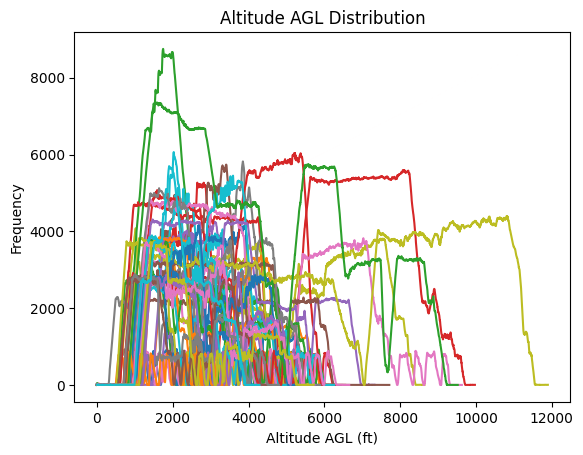

In [101]:
graph1 = dfArray[0]['AltAGL'].plot(kind='line', title='Altitude AGL Distribution')
plt.xlabel('Altitude AGL (ft)')
plt.ylabel('Frequency')

for x in range (1,50):
    dfArray[x]['AltAGL'].plot(ax=graph1, kind='line')
    
# df2['AltAGL'].plot(ax=graph1, kind='line')
plt.show()


Isolation Criteria:

Certain Delta change in a certain X window
Must be a negative delta change
Maybe if it's a descent from 1000 AGl to 0 AGL a net delta of -1500 Feet to account for any climbs or level offs within the descent profile.

Pseudo Code:
while X2 < dataframe.length() 
If in X1=0 to X2= 100 there is Delta of -1500, then isolate
Else, X1 + 100, X2 + 100

In [6]:
import re

runways = pd.read_csv('../../Project_Data/Empirical_Data/27_Nov_2025_APT_CSV/APT_RWY.csv')
airports = pd.read_csv('../../Project_Data/Empirical_Data/27_Nov_2025_APT_CSV/APT_BASE.csv')
# runways.head().__len__()
# airports.__len__()



mergedData = pd.merge(airports,runways, how='right', left_on='ARPT_ID', right_on='ARPT_ID')
# airports.merge(runways, how='right', left_on='ARPT_ID', right_on='ARPT_ID').head()
# mergedData.head()
# mergedData.__len__()
# mergedData['ARPT_ID'].__len__()

def findRunway(runwayToFind:int,fieldElevation:int=0,headingTolerance:int=10,elevationTolerance:int=5,minRunwayLength:int=3000):
    airportList = []
    runwayIDs = mergedData['RWY_ID'].tolist()
    airportElevations = mergedData['ELEV'].tolist()
    runwayLengths = mergedData['RWY_LEN'].tolist()
    # runwayToFind = 123
    index = 0
    for runway in runwayIDs:
        # print(runway)
        if(runway is np.nan or not re.search('[*/*]', runway)):
            index+=1
            continue
        pavement = runway.split('/')
        # print(borf)
        # print((int('12' + '0') == 120))
        for rwy in pavement:
            if(not re.search('[a-zA-Z]', rwy)):
                if(int(str(rwy) + '0') < runwayToFind+headingTolerance and int(str(rwy) + '0') > runwayToFind-headingTolerance and airportElevations[index] >= float(fieldElevation)-elevationTolerance and airportElevations[index] <= float(fieldElevation)+elevationTolerance
                and runwayLengths[index] >= minRunwayLength):
                    # print(runways.iloc[index]['ARPT_ID'] + f' Runway: {borf} on landing heading {runwayToFind} within {int(borf + '0')-runwayToFind}')
                    print(mergedData.iloc[index]['ARPT_ID'])
                    airportList.append((mergedData.iloc[index]['ARPT_ID'],runwayToFind,rwy,int(rwy + '0')-runwayToFind))
        index+=1
    return airportList

list = findRunway(340,16,10,5,5000)
list.__len__()
list[0:10]


SUA
IYA
OQU
BPT


/var/folders/mg/0046pj397qn7zqxn7sxp4b_w0000gn/T/ipykernel_2431/1271013689.py:4: DtypeWarning: Columns (44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  airports = pd.read_csv('../../Project_Data/Empirical_Data/27_Nov_2025_APT_CSV/APT_BASE.csv')


[('SUA', 340, '34', 0),
 ('IYA', 340, '34', 0),
 ('OQU', 340, '34', 0),
 ('BPT', 340, '34', 0)]

Found Descent in flight 86: From 1003.0 ft AGL to 0.0 ft AGL over 335 data points.
Found Descent in flight 87: From 1005.0 ft AGL to 0.0 ft AGL over 505 data points.
Found Descent in flight 88: From 1019.0 ft AGL to 0.0 ft AGL over 226 data points.
Found Descent in flight 88: From 1002.0 ft AGL to 0.0 ft AGL over 829 data points.
Heading: 266.1 ---- Elevation:  839.0
63IL
I83
70XS
[('63IL', np.float64(266.1), '27', np.float64(3.8999999999999773)), ('I83', np.float64(266.1), '26', np.float64(-6.100000000000023)), ('70XS', np.float64(266.1), '27', np.float64(3.8999999999999773))]
Heading: 178.3 ---- Elevation: 838.9
5KY2
4S5
[('5KY2', np.float64(178.3), '17', np.float64(-8.300000000000011)), ('4S5', np.float64(178.3), '17', np.float64(-8.300000000000011))]
Heading: 357.5 ---- Elevation: 838.4
5KY2
4S5
[('5KY2', np.float64(357.5), '35', np.float64(-7.5)), ('4S5', np.float64(357.5), '35', np.float64(-7.5))]
Heading: 263.0 ---- Elevation: 835.9
3GV
BCK
[('3GV', np.float64(263.0), '27', np.f

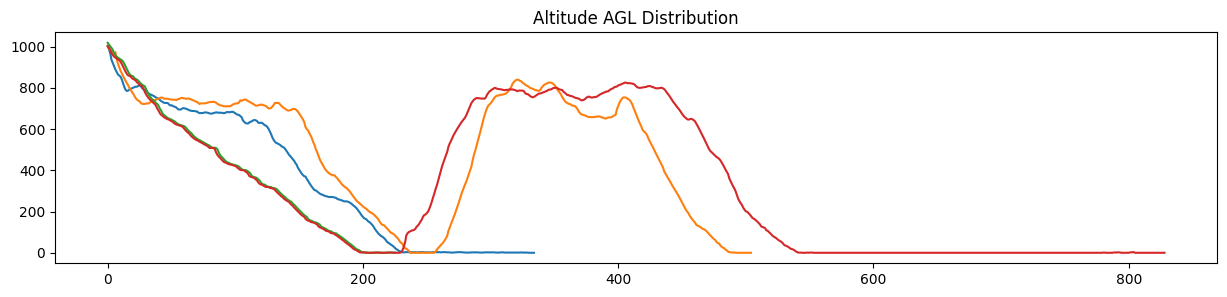

In [21]:
# def spliceDataFrame(x1,x2,data):

descentArray = []
headingAtLanding = []
fieldElevation = []
crossWindComponent = []


for x in range (86,89):
    currdf = dfArray[x]
    # x1 = 0
    # x2 = 50

    for stepCount in range(50,1000):
        step = stepCount
        altitudeDeltaThreshold = 800

        for xInner in range(0, currdf.__len__()-step, step):
            storageCount = 0
            x1 = xInner
            x2 = xInner+step
            delta = currdf['AltAGL'][x1] - currdf['AltAGL'][x2]
            if delta >= altitudeDeltaThreshold and currdf['AltAGL'][x2] <= 0 and currdf['AltAGL'][x1] > 0.0:
                # print(f"Found Descent in flight {x}: From {currdf['AltAGL'][x1]} ft AGL to {currdf['AltAGL'][x2]} ft AGL over {x2-x1} data points.")
                if(currdf['AltAGL'][x1] <= 1020 and currdf['AltAGL'][x1] >=1000):
                    print(f"Found Descent in flight {x}: From {currdf['AltAGL'][x1]} ft AGL to {currdf['AltAGL'][x2]} ft AGL over {x2-x1} data points.")
                    newDataFrame = pd.DataFrame(currdf[:][x1:x2]).reset_index()
                    descentArray.append(newDataFrame)
                    headingAtLanding.append(currdf[' HDG'][x2]) #Heading at Landing
                    fieldElevation.append(currdf[' AltMSL'][x2]) #Field Elevation at Landing
                    # crossWindComponent.append(currdf[' WndSpd'][x2] * math.sin(currdf[' HDG'][x2]-currdf[' WndDr'][x2])) #Crosswind Component at Landing


                    storageCount+=1

        
        # descentArray[0].head()
        # x1 = xInner
        # x2 = xInner+step

descentArray.__len__()
axes = descentArray[0]['AltAGL'].plot(kind='line', title='Altitude AGL Distribution',figsize=(15,3))
# descentArray[0][' HDG'].plot(ax=axes, kind='line')
# descentArray[0][' Roll'].plot(ax=axes, kind='line',secondary_y=True)
# descentArray[0][' Pitch'].plot(ax=axes, kind='line',secondary_y=True)
print("Heading:",headingAtLanding[0],"----", "Elevation:",fieldElevation[0])
print(findRunway(headingAtLanding[0],fieldElevation[0],10,1,2500))



# descentArray[0][' GndSpd'].plot(ax=axes, kind='line', title='Altitude AGL Distribution',figsize=(15,3),secondary_y=True)
# axes = descentArray[0][' COM1'].plot( kind='hist', secondary_y=True)

descentFreqList = []
for x in range(1,descentArray.__len__()):
    descentArray[x]['AltAGL'].plot(ax=axes, kind='line')
    # descentArray[x][' HDG'].plot(ax=axes, kind='line',secondary_y=True) 
    print("Heading:",headingAtLanding[x],"----", "Elevation:",fieldElevation[x])
    print(findRunway(headingAtLanding[x],fieldElevation[x],10,1,2500))

    # descentArray[x][' GndSpd'].plot(ax=axes, kind='line',secondary_y=True)
    # descentArray[x][' GndSpd'].plot(ax=axes, kind='line',secondary_y=True)
    # descentArray[x][' COM1'].plot( kind='hist',  secondary_y=True)
    # descentFreq = descentArray[0][' COM1'].unique()
    # print(descentFreq)
    # descentFreqList.append(descentFreq)

# descentFreqSer = pd.Series(descentFreqList)

# print(descentFreqSer.value_counts())
# descentFreqSer.hist()

# axes.set_ylim(0,1000)
# axes.autoscale(enable=True, axis='x', tight=True)
plt.show()

In [ ]:
descentFreq = descentArray[0][' COM1'].unique()

array([120.55])

Backwards from when pilot/operator stops the aircraft (use the groundspeed variable = 0 or some other threshold)
Use another indicator (like landing gear, power reduction, etc.) to lineup landings from different pilots 
I.e. find a common denominator

Take the heading right before landing within a few degrees of each other.
If we want to make it even better, combine it with Sea level elevation.
Will enable us to cluster the flights
Can even take this data and extract a measure of it's heading and a measure of it's sea level elevation and run a clustering algorithm on it.

Can label with unique airport identifier

## Frequencies
use .value_count to see the frequency of frequency occurence

## Values to Analyze

### Cluster the landings/descents
    Location: 
        Frequencies
        headings
        barometric altitudes at 0 AGL (Field Elevation)

    Environmental COnditions
        WndDr - Wind Direction
        WndSpd - Wind Speed

    Timing/Phase:
        Power Settings/Throttle
        Pitch changes

### Data Exploration Phase 1: Infinity War

1. Tag Landings with airport identifier
Filter on one airport with a decent amount of data (10,20,etc.)
Begins to give/be able to tell similarities across flights at a given airport (Think MS Paint)
Can calculate averages (would end up close to some ideal/standard) -- would smooth out the individual differences


2. Visualization to put them on top of each other/overlay (Use GndSpd to calculate ground distance travelled, calculate back from point of touchdown to assign a distance in feet to each row of a flight's descent, use this as plot on X axis).

3. MSE for the different plane state variables; 

Between Emperical and Simulation
    Ground Speed
    Pitch

What feature in the human data is not being captured that leads to error between human data and the model data.


### Data Exploration Phase 2: Endgame

### Data Exploration Phase 3: Disney+? 





